# The project is about prediction the price of house in India

In [1]:
# Necessary imports Library
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [55]:
#read the data file
df = pd.read_csv('houses.csv')

In [56]:
#import 5 rows of data
df.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [57]:
#(no. of rows,no. of columns)
df.shape

(29451, 12)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [59]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [60]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


##  Exploratory Data Analysis ( EDA )

In [61]:
df['BHK_OR_RK'].nunique()

2

In [62]:
df.BHK_OR_RK.unique()

array(['BHK', 'RK'], dtype=object)

In [63]:
#replacing the BHK to 1 and PK to 0
df['BHK_OR_RK'] = df['BHK_OR_RK'].apply(lambda x: 1 if x == 'BHK' else 0)

In [64]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,1,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,1,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,1,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [65]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,0.999185,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,0.028536,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,0.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,1.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,1.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [66]:
df['POSTED_BY'].nunique()

3

In [67]:
df.POSTED_BY.unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

<AxesSubplot:>

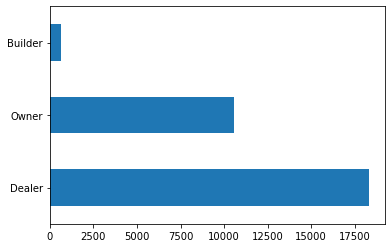

In [68]:
df.POSTED_BY.value_counts().plot(kind='barh')

#### in the most case there are a Dealer

#### coding the (posted_by) 0= Owner,1=Dealer,2=Builder

In [69]:
df['POSTED_BY'] = df['POSTED_BY'].replace(to_replace=['Owner','Dealer','Builder'],value=[0,1,2])

In [70]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,1,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,0,0,2,1,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,0,0,0,2,1,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,0,0,1,2,1,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,1,1,0,2,1,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


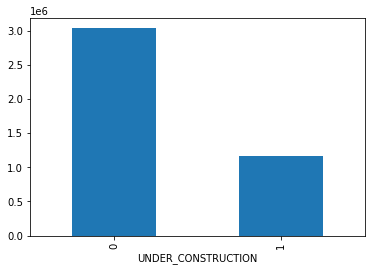

In [71]:
ax = df.groupby('UNDER_CONSTRUCTION').sum().iloc[:,-1].plot(kind='bar')


####  the house under constration is more costly than another

C:\Users\Saleh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

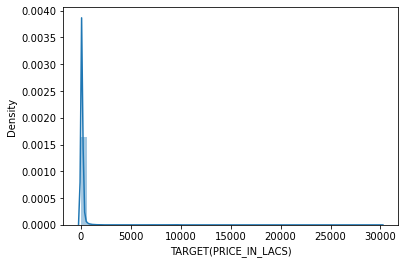

In [72]:
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

In [73]:
df['TARGET(PRICE_IN_LACS)'].value_counts()

110.0     795
100.0     770
120.0     652
130.0     598
45.0      583
         ... 
1890.0      1
248.0       1
1.5         1
7390.0      1
810.0       1
Name: TARGET(PRICE_IN_LACS), Length: 1172, dtype: int64

In [76]:
len(df)*(0.04)

1152.8

C:\Users\Saleh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

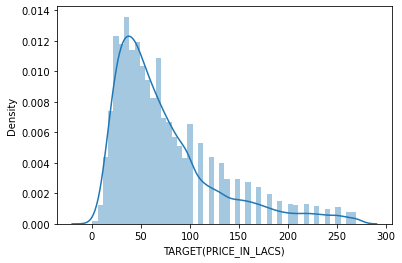

In [77]:
# Remove the price outliers
df = df.sort_values('TARGET(PRICE_IN_LACS)',ascending=False).iloc[1153:]
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

In [23]:
df.corr()['TARGET(PRICE_IN_LACS)']

POSTED_BY                0.273107
UNDER_CONSTRUCTION       0.029167
RERA                     0.128893
BHK_NO.                  0.417240
BHK_OR_RK                0.017190
SQUARE_FT                0.008418
READY_TO_MOVE           -0.029167
RESALE                  -0.008759
LONGITUDE               -0.101499
LATITUDE                -0.060596
TARGET(PRICE_IN_LACS)    1.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

<AxesSubplot:>

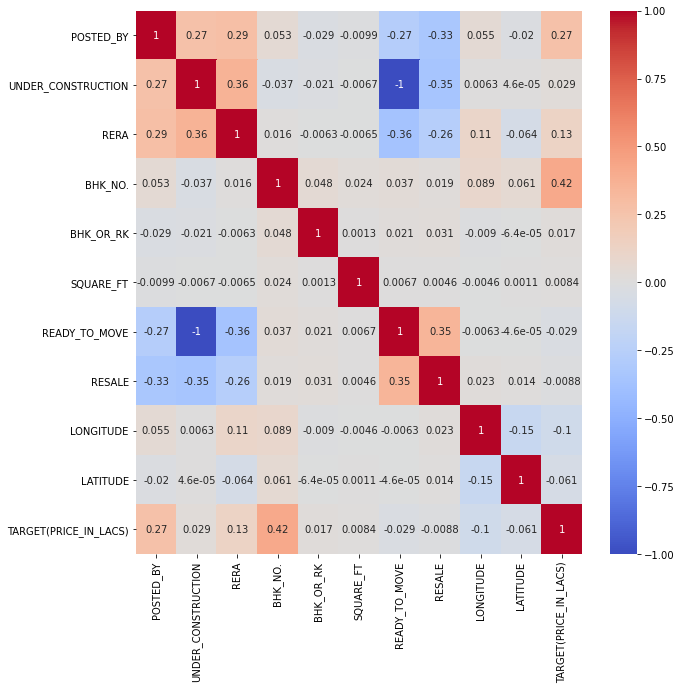

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

#### the (READY_TO_MOVE) and (UNDER_CONSTRUCTION) are 100% related to gether, so it must drop one of them

In [25]:
df.drop('READY_TO_MOVE', inplace=True, axis=1)

In [26]:
df['ADDRESS'].nunique()

6764

####  Delete string feature (Address)

In [27]:
df.drop('ADDRESS', inplace=True, axis=1)

In [28]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
19170,1,0,0,2,1,1235.294118,1,19.070500,72.830900,420.0
8381,1,0,0,2,1,216494.845400,1,24.690280,78.418890,420.0
21340,1,1,1,3,1,2465.656921,1,18.585840,73.471734,420.0
20103,1,0,0,4,1,2855.977152,1,19.255098,72.981527,420.0
2190,1,0,0,5,1,3021.800130,1,24.690280,78.418890,420.0


## Spilt

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET(PRICE_IN_LACS)', axis=1), df['TARGET(PRICE_IN_LACS)'], 
                                                    test_size = 0.2, random_state=42)

In [30]:
X_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
8843,0,0,0,2,1,1200.000000,1,16.499949,80.645732
17946,0,0,1,3,1,1445.229102,1,13.041421,77.500532
16728,1,0,0,3,1,1554.550594,1,28.478619,77.291147
22363,1,0,0,3,1,1497.753370,1,12.928575,77.585721
21266,1,1,0,4,1,2900.763359,1,28.390964,77.334229


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28567 entries, 19170 to 14036
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              28567 non-null  int64  
 1   UNDER_CONSTRUCTION     28567 non-null  int64  
 2   RERA                   28567 non-null  int64  
 3   BHK_NO.                28567 non-null  int64  
 4   BHK_OR_RK              28567 non-null  int64  
 5   SQUARE_FT              28567 non-null  float64
 6   RESALE                 28567 non-null  int64  
 7   LONGITUDE              28567 non-null  float64
 8   LATITUDE               28567 non-null  float64
 9   TARGET(PRICE_IN_LACS)  28567 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 2.4 MB


In [32]:
X_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
2064,1,0,0,3,1,1472.086966,1,13.034780,80.155860
25926,1,0,0,3,1,2450.379809,1,28.567900,77.367900
16778,1,0,0,3,1,3984.470781,1,28.403138,77.070052
10233,0,0,0,2,1,1281.287247,1,13.090000,80.270000
1531,0,0,0,2,1,1000.000000,1,22.330000,77.100000


In [33]:
y_test.head()

2064     130.0
25926    100.0
16778    390.0
10233     43.0
1531      22.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

## Modeling

#### Linear Regression

In [34]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
y_pred = lm1.predict(X_test)
print("R2 : ",r2_score(y_test, y_pred))
print("MSE : ",mean_squared_error(y_test, y_pred))

R2 :  0.29152749090100516
MSE :  3256.6117617801697


In [42]:
#lm2 = PolynomialFeatures(degree=4)

#X_poly = lm2.fit_transform(X_train)
 
#lm2.fit(X_poly, y_train)
#lin2 = LinearRegression()
#lin2.fit(X_poly, y_train)
#y_pred =  lin2.predict(lm2.fit_transform(110.0))
#print("R2 : ",r2_score(y_test, y_pred))
#print("MSE : ",mean_squared_error(y_test, y_pred)) 


In [43]:
lm3=RidgeCV((0.1, 1.0, 10))
lm3.fit(X_train, y_train)
y_pred = lm3.predict(X_test)
print("R2 : ",r2_score(y_test, y_pred))
print("MSE : ",mean_squared_error(y_test, y_pred))

R2 :  0.2915274205076904
MSE :  3256.6120853547527


In [36]:
lm4=GradientBoostingRegressor()
lm4.fit(X_train, y_train)
y_pred = lm4.predict(X_test)
print("R2 : ",r2_score(y_test, y_pred))
print("MSE : ",mean_squared_error(y_test, y_pred))

R2 :  0.7042581475390606
MSE :  1359.4266295523612


## The Good modling is GradientBoostingRegressor because it has higher r^2

In [41]:
result=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
result.head()

,y_test,y_pred
2064,130.0,95.314216
25926,100.0,148.499143
16778,390.0,268.173035
10233,43.0,62.682820
1531,22.0,35.458632
